In [2]:
!pip install ttach

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
#import albumentations as albu
#from albumentations.pytorch import ToTensorV2

In [4]:
#Device check and load model into device
def get_default_device():
    """Pick GPU if available, else CPU"""
    if torch.cuda.is_available():
        return torch.device('cuda')
    else:
        return torch.device('cpu')
    
def to_device(data, device):
    """Move tensor(s) to chosen device"""
    if isinstance(data, (list,tuple)):
        return [to_device(x, device) for x in data]
    return data.to(device, non_blocking=True)

class DeviceDataLoader():
    """Wrap a dataloader to move data to a device"""
    def __init__(self, dl, device):
        self.dl = dl
        self.device = device
        
    def __iter__(self):
        """Yield a batch of data after moving it to device"""
        for b in self.dl: 
            yield to_device(b, self.device)

    def __len__(self):
        """Number of batches"""
        return len(self.dl)

In [5]:
#install thop for count PARAMS and Flops
!pip install thop
#!pip install webdataset

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
pip install transformers -i https://pypi.tuna.tsinghua.edu.cn/simple

Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install pytorch_toolbelt

In [ ]:
!pip install utils

from __future__ import print_function

import argparse
import os
import shutil
import time
import random

import torch
import torch.nn as nn
import torch.nn.parallel
import torch.backends.cudnn as cudnn
import torch.optim as optim
import torch.utils.data as data
from torchvision import transforms
import torchvision.datasets as datasets
#import models.cifar as models
import torchvision.models as models

#from utils import Bar, Logger, AverageMeter, accuracy, mkdir_p, savefig
#from utils import mkdir_p, savefig

model_names = sorted(name for name in models.__dict__
    if name.islower() and not name.startswith("__")
    and callable(models.__dict__[name]))

parser = argparse.ArgumentParser(description='PyTorch CIFAR10 and 100 Training')
# Datasets
parser.add_argument('-d', '--dataset', default='cifar10', type=str)
parser.add_argument('-j', '--workers', default=4, type=int, metavar='N',
                    help='number of data loading workers (default: 4)')
# Optimization options
parser.add_argument('--epochs', default=300, type=int, metavar='N',
                    help='number of total epochs to run')
parser.add_argument('--start-epoch', default=0, type=int, metavar='N',
                    help='manual epoch number (useful on restarts)')
parser.add_argument('--train-batch', default=128, type=int, metavar='N',
                    help='train batchsize')
parser.add_argument('--test-batch', default=100, type=int, metavar='N',
                    help='test batchsize')
parser.add_argument('--lr', '--learning-rate', default=0.1, type=float,
                    metavar='LR', help='initial learning rate')
parser.add_argument('--drop', '--dropout', default=0, type=float,
                    metavar='Dropout', help='Dropout ratio')
parser.add_argument('--schedule', type=int, nargs='+', default=[150, 225],
                        help='Decrease learning rate at these epochs.')
parser.add_argument('--gamma', type=float, default=0.1, help='LR is multiplied by gamma on schedule.')
parser.add_argument('--momentum', default=0.9, type=float, metavar='M',
                    help='momentum')
parser.add_argument('--weight-decay', '--wd', default=5e-4, type=float,
                    metavar='W', help='weight decay (default: 1e-4)')
# Checkpoints
parser.add_argument('-c', '--checkpoint', default='checkpoint', type=str, metavar='PATH',
                    help='path to save checkpoint (default: checkpoint)')
parser.add_argument('--resume', default='', type=str, metavar='PATH',
                    help='path to latest checkpoint (default: none)')
# Architecture
parser.add_argument('--arch', '-a', metavar='ARCH', default='resnet',
                    choices=model_names,
                    help='model architecture: ' +
                        ' | '.join(model_names) +
                        ' (default: resnet20)')
parser.add_argument('--depth', type=int, default=20, help='Model depth.')
parser.add_argument('--widen-factor', type=int, default=10, help='Widen factor. 10')
parser.add_argument('--growthRate', type=int, default=12, help='Growth rate for DenseNet.')
parser.add_argument('--compressionRate', type=int, default=2, help='Compression Rate (theta) for DenseNet.')
# Miscs
parser.add_argument('--manualSeed', type=int, help='manual seed')
parser.add_argument('-e', '--evaluate', dest='evaluate', action='store_true',
                    help='evaluate model on validation set')

# Random Erasing
parser.add_argument('--p', default=0, type=float, help='Random Erasing probability')
parser.add_argument('--sh', default=0.4, type=float, help='max erasing area')
parser.add_argument('--r1', default=0.3, type=float, help='aspect of erasing area')

args = parser.parse_args()
state = {k: v for k, v in args._get_kwargs()}
# Validate dataset
assert args.dataset == 'cifar10' or args.dataset == 'cifar100', 'Dataset can only be cifar10 or cifar100.'

# Use CUDA
use_cuda = torch.cuda.is_available()

# Random seed
if args.manualSeed is None:
    args.manualSeed = random.randint(1, 10000)
random.seed(args.manualSeed)
torch.manual_seed(args.manualSeed)
if use_cuda:
    torch.cuda.manual_seed_all(args.manualSeed)

best_acc = 0  # best test accuracy

def main():
    global best_acc
    start_epoch = args.start_epoch  # start from epoch 0 or last checkpoint epoch

    if not os.path.isdir(args.checkpoint):
        mkdir_p(args.checkpoint)

In [9]:
import pandas as pd
import os
import torch
import time
import torchvision
import torch.nn as nn
import numpy as np
import torch.nn.functional as F
from torchvision.datasets.utils import download_url
from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader
import torchvision.transforms as tt
from torch.utils.data import random_split
from torchvision.utils import make_grid
import torchvision.models as models
import matplotlib.pyplot as plt
from sklearn.metrics import *
#import ttach as tta
#tta_model = tta.ClassificationTTAWrapper(model, tta.aliases.five_crop_transform())
from pytorch_toolbelt.inference import tta

##HYPER-PARAM
batch_size = 400
epochs = 120
max_lr = 0.001
grad_clip = 0.01
weight_decay =0.001
opt_func = torch.optim.Adam

##DOWNLOAD dataset
train_data = torchvision.datasets.CIFAR100('./', train=True, download=True)
# Stick all the images together to form a 1600000 X 32 X 3 array
x = np.concatenate([np.asarray(train_data[i][0]) for i in range(len(train_data))])
# calculate the mean and std along the (0, 1) axes
mean = np.mean(x, axis=(0, 1))/255
std = np.std(x, axis=(0, 1))/255
# the the mean and std
mean=mean.tolist()
std=std.tolist()

##########随机遮挡：
class Cutout(object):
    """Randomly mask out one or more patches from an image.
    Args:
        n_holes (int): Number of patches to cut out of each image.
        length (int): The length (in pixels) of each square patch.
    """
    def __init__(self, n_holes, length):
        self.n_holes = n_holes
        self.length = length

    def __call__(self, img):
        """
        Args:
            img (Tensor): Tensor image of size (C, H, W).
        Returns:
            Tensor: Image with n_holes of dimension length x length cut out of it.
        """
        h = img.size(1)
        w = img.size(2)

        mask = np.ones((h, w), np.float32)

        for n in range(self.n_holes):
        	# (x,y)表示方形补丁的中心位置
            y = np.random.randint(h)
            x = np.random.randint(w)

            y1 = np.clip(y - self.length // 2, 0, h)
            y2 = np.clip(y + self.length // 2, 0, h)
            x1 = np.clip(x - self.length // 2, 0, w)
            x2 = np.clip(x + self.length // 2, 0, w)

            mask[y1: y2, x1: x2] = 0.

        mask = torch.from_numpy(mask)
        mask = mask.expand_as(img)
        img = img * mask

        return img

##TRANSFORM
transform_train = tt.Compose([tt.RandomCrop(32, padding=4,padding_mode='reflect'), 
                         tt.RandomHorizontalFlip(), 
                         tt.ToTensor(), 
                         tt.Normalize(mean,std,inplace=True),
                         Cutout(n_holes=1, length=16)])
transform_test = tt.Compose([tt.ToTensor(), tt.Normalize(mean,std)])                        

##DATASET and DATALOADER
trainset = torchvision.datasets.CIFAR100("./",
                                         train=True,
                                         download=True,
                                         transform=transform_train)
trainloader = torch.utils.data.DataLoader(
    trainset, batch_size, shuffle=True, num_workers=2,pin_memory=True)

testset = torchvision.datasets.CIFAR100("./",
                                        train=False,
                                        download=True,
                                        transform=transform_test)
testloader = torch.utils.data.DataLoader(
    testset, batch_size*2,pin_memory=True, num_workers=2)

#LOADER
device = get_default_device()
trainloader = DeviceDataLoader(trainloader, device)
testloader = DeviceDataLoader(testloader, device)

  0%|          | 0/169001437 [00:00<?, ?it/s]

Extracting ./cifar-100-python.tar.gz to ./
Files already downloaded and verified
Files already downloaded and verified


In [10]:
##TRAINING SETUP
def accuracy(outputs, labels):
    _, preds = torch.max(outputs, dim=1)
    return torch.tensor(torch.sum(preds == labels).item() / len(preds))

class ImageClassificationBase(nn.Module):
    def training_step(self, batch):
        images, labels = batch 
        out = self(images)                  # Generate predictions
        loss = F.cross_entropy(out, labels) # Calculate loss
        return loss
    
    def validation_step(self, batch):
        images, labels = batch 
        out = self(images)                    # Generate predictions
        loss = F.cross_entropy(out, labels)   # Calculate loss
        acc = accuracy(out, labels)           # Calculate accuracy
        return {'val_loss': loss.detach(), 'val_acc': acc}
        
    def validation_epoch_end(self, outputs):
        batch_losses = [x['val_loss'] for x in outputs]
        epoch_loss = torch.stack(batch_losses).mean()   # Combine losses
        batch_accs = [x['val_acc'] for x in outputs]
        epoch_acc = torch.stack(batch_accs).mean()      # Combine accuracies
        return {'val_loss': epoch_loss.item(), 'val_acc': epoch_acc.item()}
    
    def epoch_end(self, epoch, result):
        print("Epoch [{}], last_lr: {:.5f}, train_loss: {:.4f}, val_loss: {:.4f}, val_acc: {:.4f}".format(
            epoch, result['lrs'][-1], result['train_loss'], result['val_loss'], result['val_acc']))


In [11]:
#NET
def conv_block(in_channels, out_channels, pool=False):
    layers = [nn.Conv2d(in_channels, out_channels, kernel_size=3, padding=1), 
              nn.BatchNorm2d(out_channels), 
              nn.ReLU(inplace=True)]
    if pool: layers.append(nn.MaxPool2d(2))
    return nn.Sequential(*layers)

class ResNet9(ImageClassificationBase):
    def __init__(self, in_channels, num_classes):
        super().__init__()
        
        self.conv1 = conv_block(in_channels, 64)
        self.conv2 = conv_block(64, 128, pool=True) 
        self.res1 = nn.Sequential(conv_block(128, 128), conv_block(128, 128)) 
        
        self.conv3 = conv_block(128, 256, pool=True)
        self.conv4 = conv_block(256, 512, pool=True) 
        self.res2 = nn.Sequential(conv_block(512, 512), conv_block(512, 512)) 
        self.conv5 = conv_block(512, 1028, pool=True) 
        self.res3 = nn.Sequential(conv_block(1028, 1028), conv_block(1028, 1028))  
        
        self.classifier = nn.Sequential(nn.MaxPool2d(2), # 1028 x 1 x 1
                                        nn.Flatten(), # 1028 
                                        nn.Linear(1028, num_classes)) # 1028 -> 100
        
    def forward(self, xb):
        out = self.conv1(xb)
        out = self.conv2(out)
        out = self.res1(out) + out
        out = self.conv3(out)
        out = self.conv4(out)
        out = self.res2(out) + out
        out = self.conv5(out)
        out = self.res3(out) + out
        out = self.classifier(out)
        return out

model = to_device(ResNet9(3, 100), device)


In [12]:
########mixup:
alpha = 1.0  # 默认设置为1
criterion = nn.CrossEntropyLoss()
for (inputs, labels) in trainloader:
  lam = np.random.beta(alpha, alpha)
  index = torch.randperm(inputs.size(0))
  images_a, images_b = inputs, inputs[index]
  labels_a, labels_b = labels, labels[index]
  mixed_images = lam * images_a + (1 - lam) * images_b
  outputs = model(mixed_images)
  _, preds = torch.max(outputs, 1)
  loss = lam * criterion(outputs, labels_a) + (1 - lam) * criterion(outputs, labels_b)

In [13]:
#SEE YOUR MODEL
model

ResNet9(
  (conv1): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
  )
  (conv2): Sequential(
    (0): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (res1): Sequential(
    (0): Sequential(
      (0): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU(inplace=True)
    )
    (1): Sequential(
      (0): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU(inplace=Tr

In [14]:
#Training Setup
@torch.no_grad()
###############################网络剪枝0.05
def prune_network(model, pruning_percent):
    for name, module in model.named_modules():
        if isinstance(module, nn.Conv2d) or isinstance(module, nn.Linear):
            prune.random_unstructured(module, name="weight", amount=pruning_percent)

def evaluate(model, test_loader):
    model.eval()
    outputs = [model.validation_step(batch) for batch in test_loader]
    return model.validation_epoch_end(outputs)

def get_lr(optimizer):
    for param_group in optimizer.param_groups:
        return param_group['lr']

def fit_one_cycle(epochs, max_lr, model, train_loader, test_loader, 
                  weight_decay=0, grad_clip=None, opt_func=torch.optim.SGD):
    torch.cuda.empty_cache()
    history = []
    
    # Set up cutom optimizer with weight decay
    optimizer = opt_func(model.parameters(), max_lr, weight_decay=weight_decay)
    # Set up one-cycle learning rate scheduler
    sched = torch.optim.lr_scheduler.OneCycleLR(optimizer, max_lr, epochs=epochs, 
                                                steps_per_epoch=len(train_loader))
    
    for epoch in range(epochs):
        # Training Phase 
        #pruning_percent = 0.2
        #model.prune_network()
        model.train()
        train_losses = []
        lrs = []
        for batch in train_loader:
            loss = model.training_step(batch)
            train_losses.append(loss)
            loss.backward()
            
            # Gradient clipping
            if grad_clip: 
                nn.utils.clip_grad_value_(model.parameters(), grad_clip)
            
            optimizer.step()
            optimizer.zero_grad()
            
            # Record & update learning rate
            lrs.append(get_lr(optimizer))
            sched.step()
        
        # Validation phase
        result = evaluate(model, test_loader)
        result['train_loss'] = torch.stack(train_losses).mean().item()
        result['lrs'] = lrs
        model.epoch_end(epoch, result)
        history.append(result)
    return history

In [ ]:
#Training(Using Multi_LR)
history = [evaluate(model, testloader)] ## Initial evaluation
# Fitting the first 1/4 
current_time=time.time()
history += fit_one_cycle(int(epochs/4), max_lr, model, trainloader, testloader, 
                             grad_clip=grad_clip, 
                             weight_decay=weight_decay, 
                             opt_func=opt_func)
# Fitting the first 2/4 epochs
history += fit_one_cycle(int(epochs/4), max_lr/10, model, trainloader, testloader, 
                             grad_clip=grad_clip, 
                             weight_decay=weight_decay, 
                             opt_func=opt_func)
# Fitting the first 3/4 
history += fit_one_cycle(int(epochs/4), max_lr/100, model, trainloader, testloader, 
                             grad_clip=grad_clip, 
                             weight_decay=weight_decay, 
                             opt_func=opt_func)
# Fitting the first 4/4 epochs
history += fit_one_cycle(int(epochs/4), max_lr/100, model, trainloader, testloader, 
                             grad_clip=grad_clip, 
                             weight_decay=weight_decay, 
                             opt_func=opt_func)
# Print training time
time_train = time.time() - current_time
print('Training time: {:.2f} s'.format(time_train))

Epoch [0], last_lr: 0.00007, train_loss: 3.8177, val_loss: 3.2406, val_acc: 0.2264
Epoch [1], last_lr: 0.00015, train_loss: 3.2003, val_loss: 2.9765, val_acc: 0.2625
Epoch [2], last_lr: 0.00028, train_loss: 2.8919, val_loss: 2.9125, val_acc: 0.2817
Epoch [3], last_lr: 0.00044, train_loss: 2.6820, val_loss: 2.5380, val_acc: 0.3466
Epoch [4], last_lr: 0.00060, train_loss: 2.5100, val_loss: 2.5245, val_acc: 0.3715
Epoch [5], last_lr: 0.00076, train_loss: 2.3258, val_loss: 2.5374, val_acc: 0.3681
Epoch [6], last_lr: 0.00089, train_loss: 2.1940, val_loss: 2.1147, val_acc: 0.4418
Epoch [7], last_lr: 0.00097, train_loss: 2.0685, val_loss: 1.8843, val_acc: 0.4972
Epoch [8], last_lr: 0.00100, train_loss: 1.9370, val_loss: 2.1549, val_acc: 0.4525
Epoch [9], last_lr: 0.00099, train_loss: 1.8157, val_loss: 2.1249, val_acc: 0.4470
Epoch [10], last_lr: 0.00098, train_loss: 1.7272, val_loss: 2.3838, val_acc: 0.4136
Epoch [11], last_lr: 0.00095, train_loss: 1.6332, val_loss: 1.6594, val_acc: 0.5371
Ep

# Fitting the first 2/4 epochs
history += fit_one_cycle(int(epochs/4), max_lr/10, model, trainloader, testloader, 
                             grad_clip=grad_clip, 
                             weight_decay=weight_decay, 
                             opt_func=opt_func)
# Fitting the first 3/4 
history += fit_one_cycle(int(epochs/4), max_lr/100, model, trainloader, testloader, 
                             grad_clip=grad_clip, 
                             weight_decay=weight_decay, 
                             opt_func=opt_func)
# Fitting the first 4/4 epochs
history += fit_one_cycle(int(epochs/4), max_lr/100, model, trainloader, testloader, 
                             grad_clip=grad_clip, 
                             weight_decay=weight_decay, 
                             opt_func=opt_func)

In [ ]:
# Collect training time and result
current_time = time.time()
result = evaluate(model, testloader)
result
time_inference = time.time() - current_time
print('Inference time: {:.2f} s'.format(time_inference))


In [ ]:
# Saving the model to h5 file
torch.save(model.state_dict(), 'group22_pretrained_model.h5')
# Generate testing accuracy, predicted label, confusion matrix, and table for classification report
def test_label_predictions(model, device, test_loader):
    model.eval()
    actuals = []
    predictions = []
    with torch.no_grad():
        for data, target in test_loader:
            data, target = data.to(device), target.to(device)
            output = model(data)
            prediction = output.argmax(dim=1, keepdim=True)
            actuals.extend(target.view_as(prediction))
            predictions.extend(prediction)
    return [i.item() for i in actuals], [i.item() for i in predictions]

y_test, y_pred = test_label_predictions(model, device, testloader)
cm=confusion_matrix(y_test, y_pred)
cr=classification_report(y_test, y_pred)
fs=f1_score(y_test,y_pred,average='weighted')
rs=recall_score(y_test, y_pred,average='weighted')
accuracy=accuracy_score(y_test, y_pred)
print('Confusion matrix:')
print(cm)
print(cr)
print('F1 score: %f' % fs)
print('Recall score: %f' % rs)
print('Accuracy score: %f' % accuracy)

In [ ]:
#MODEl NET
model

In [26]:
#Train Time
print('Training time: {:.2f} s'.format(time_train))

Training time: 4667.25 s


In [ ]:
#Inference Time (Test Time)
print('Inference time: {:.2f} s'.format(time_inference))

In [ ]:
!pip install thop

In [27]:
#Paramater Size and FLOPS
from thop import profile
 
input = torch.randn(1, 3, 32, 32)
input = input.to(device)
flops, params = profile(model, inputs=(input,))
print(flops)
print(params)


[INFO] Register count_convNd() for <class 'torch.nn.modules.conv.Conv2d'>.
[INFO] Register count_normalization() for <class 'torch.nn.modules.batchnorm.BatchNorm2d'>.
[INFO] Register zero_ops() for <class 'torch.nn.modules.activation.ReLU'>.
[INFO] Register zero_ops() for <class 'torch.nn.modules.container.Sequential'>.
[INFO] Register zero_ops() for <class 'torch.nn.modules.pooling.MaxPool2d'>.
[INFO] Register count_linear() for <class 'torch.nn.modules.linear.Linear'>.
532846480.0
30441528.0


In [28]:
#Accuaray
print('Accuracy score: %f' % accuracy)

Accuracy score: 0.750700


In [24]:
# Plot classification report and save to pdf function
def plot_classification(precision, recall, f1_score):
    plt.rcParams['font.size'] = 12
    plt.rc('axes', linewidth=1.75)
    marker_size = 8
    figsize = 6
    plt.figure(figsize=(1.4 * figsize, figsize))
    plt.subplot(3, 1, 1)
    plt.plot(precision, 'o', markersize=marker_size)
    plt.ylabel('Precision', fontsize=14)
    plt.xticks([])
    plt.subplot(3, 1, 2)
    plt.plot(recall, 'o', markersize=marker_size)
    plt.ylabel('Recall', fontsize=14)
    plt.xticks([])
    plt.subplot(3, 1, 3)
    plt.plot(f1_score, 'o', markersize=marker_size)
    plt.ylabel('F1-score', fontsize=14)
    plt.xlabel('Class', fontsize=14)
    plt.subplots_adjust(hspace=0.001)
    plt.tight_layout()
    plt.savefig("result.pdf")
# Plot classification report and save to pdf
def plot_confusion_matrix(cm):
    plt.figure()
    plt.imshow(cm, interpolation='nearest', cmap=plt.get_cmap('Blues'))
    plt.colorbar()
    plt.ylabel('True label', fontsize=14)
    plt.xlabel('Predicted label', fontsize=14)
    plt.tight_layout()
    plt.savefig("confusion_matrix.pdf")
    plt.show()

[0.89 0.88 0.66 0.56 0.65 0.79 0.79 0.79 0.87 0.86 0.61 0.55 0.81 0.68
 0.69 0.78 0.77 0.82 0.66 0.66 0.89 0.91 0.81 0.85 0.87 0.6  0.76 0.65
 0.84 0.77 0.66 0.7  0.72 0.68 0.84 0.46 0.82 0.79 0.67 0.89 0.69 0.9
 0.68 0.86 0.52 0.71 0.52 0.71 0.92 0.87 0.61 0.8  0.65 0.93 0.89 0.52
 0.94 0.84 0.87 0.71 0.9  0.66 0.8  0.73 0.55 0.6  0.77 0.63 0.93 0.82
 0.84 0.8  0.46 0.56 0.62 0.89 0.89 0.73 0.67 0.76 0.59 0.73 0.94 0.77
 0.71 0.82 0.75 0.89 0.82 0.85 0.85 0.87 0.73 0.6  0.94 0.76 0.65 0.8
 0.53 0.77]


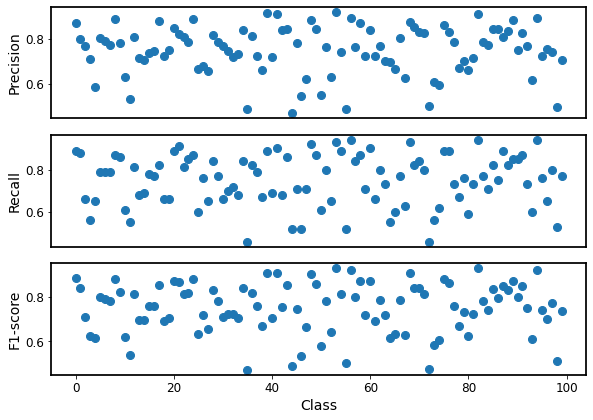

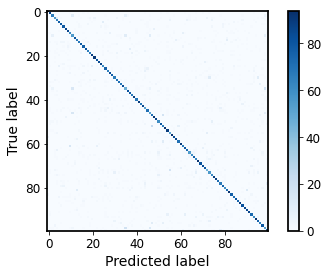

In [25]:
# Plot and save confusion matrix
precision, recall, f1,_= precision_recall_fscore_support(y_test, y_pred)
print(recall)
plot_classification(precision, recall, f1)

# Plot confusion matrix
plot_confusion_matrix(cm)